## plot_era5.ipynb
Author: Robert M. Frost

University of Oklahoma

Created 08 September 2023

Purpose: Plot ERA5 data to gain synoptic overview of simulated event

In [13]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cpf
import cmocean
import seaborn

In [2]:
pl = xr.open_dataset("/home/robbyfrost/era5/ERA5-20070817-20070821-pl.nc")
sl = xr.open_dataset("/home/robbyfrost/era5/ERA5-20070817-20070821-sl.nc")

In [3]:
plev = pl.level
lat, lon = pl.latitude, pl.longitude
time = pl.time

In [4]:
# calculate geopotential height
pl["gh"] = (pl.z / 9.81)
# m/s to knots
pl["u"] = pl.u * 1.944
pl["v"] = pl.v * 1.944
# wspd
pl["wspd"] = (pl.u ** 2 + pl.v ** 2) ** (1/2)

In [5]:
mb850 = pl.where(plev == 850, drop=True)
mb700 = pl.where(plev == 700, drop=True)
mb500 = pl.where(plev == 500, drop=True)
mb300 = pl.where(plev == 300, drop=True)
mb250 = pl.where(plev == 250, drop=True)

In [6]:
pwat = sl.tcwv

## Plot 250 mb

Text(0.5, 1.0, '250 mb valid at  2007-08-19T09:00:00.000000000')

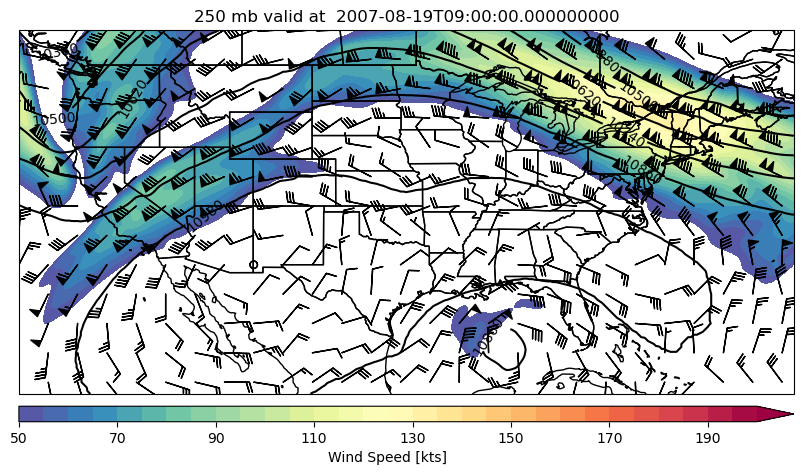

In [30]:
# geopotential height contours, wind barbs, and wind speed

time_idx = 19 #index of time of interest

clevs_gh = np.arange(10380, 11101, 120)
clevs_wspd = np.arange(50, 201, 5)

fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection': ccrs.PlateCarree()})

contour_plot = ax.contour(lon, lat, mb250.gh[time_idx,0], clevs_gh,
                          transform=ccrs.PlateCarree(), colors="black")
contourf_plot = ax.contourf(lon, lat, mb250.wspd[time_idx,0], clevs_wspd,
                            transform=ccrs.PlateCarree(), extend="max",
                            cmap=seaborn.color_palette("Spectral_r", as_cmap=True))

contour_label = plt.clabel(contour_plot)
cbar = plt.colorbar(contourf_plot, orientation="horizontal", pad=0.02, aspect=50)
cbar.set_label("Wind Speed [kts]")

ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)

# Wind barbs
spacing = 10 #barbspacing (smaller if zoomed in)
ax.barbs(lon[::spacing], lat[::spacing],
            mb250.u[time_idx,0,::spacing,::spacing], mb250.v[time_idx,0,::spacing,::spacing], 
            length=6)

ax.set_title(f"250 mb valid at  {time[time_idx].values}")

## Plot 500 mb

Text(0.5, 1.0, '500 mb valid at  2007-08-19T09:00:00.000000000')

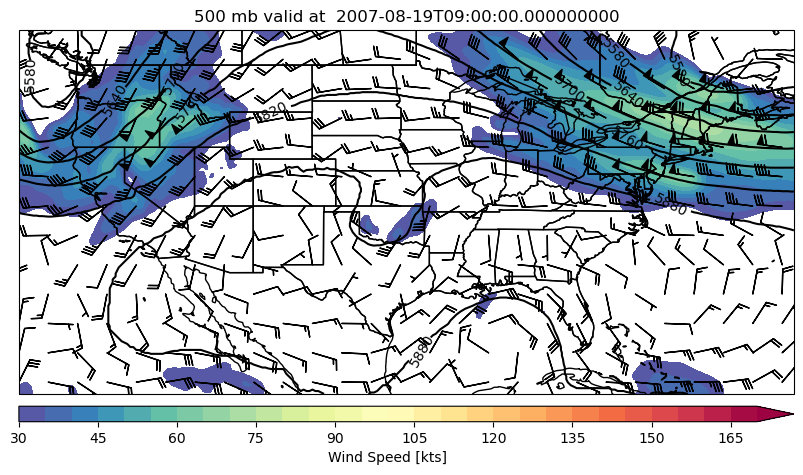

In [31]:
# geopotential height contours, wind barbs, and wind speed

time_idx = 19 #index of time of interest

clevs_gh = np.arange(5400, 6000, 60)
clevs_wspd = np.arange(30, 171, 5)

fig, ax = plt.subplots(figsize=(10,8), subplot_kw={'projection': ccrs.PlateCarree()})

contour_plot = ax.contour(lon, lat, mb500.gh[time_idx,0], clevs_gh,
                          transform=ccrs.PlateCarree(), colors="black")
contourf_plot = ax.contourf(lon, lat, mb500.wspd[time_idx,0], clevs_wspd,
                            transform=ccrs.PlateCarree(), extend="max",
                            cmap=seaborn.color_palette("Spectral_r", as_cmap=True))

contour_label = plt.clabel(contour_plot)
cbar = plt.colorbar(contourf_plot, orientation="horizontal", pad=0.02, aspect=50)
cbar.set_label("Wind Speed [kts]")

ax.coastlines()
ax.add_feature(cpf.BORDERS)
ax.add_feature(cpf.STATES)

# Wind barbs
spacing = 10 #barbspacing (smaller if zoomed in)
ax.barbs(lon[::spacing], lat[::spacing],
            mb500.u[time_idx,0,::spacing,::spacing], mb500.v[time_idx,0,::spacing,::spacing], 
            length=6)

ax.set_title(f"500 mb valid at  {time[time_idx].values}")